In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats

url = 'https://raw.githubusercontent.com/Calcious98/TIL/master/Chicago_Pothole_Weather_2011_2018(!%2B).csv'

df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        2922 non-null   object 
 1   year            2922 non-null   int64  
 2   month           2922 non-null   int64  
 3   day             2922 non-null   int64  
 4   holiday         2922 non-null   int64  
 5   temp            2922 non-null   float64
 6   tempmax         2922 non-null   float64
 7   tempmin         2922 non-null   float64
 8   humidity        2922 non-null   float64
 9   precip          2922 non-null   float64
 10  snowdepth       2922 non-null   float64
 11  solarenergy     2922 non-null   float64
 12  weather         2922 non-null   int64  
 13  dew             2922 non-null   float64
 14  precipcover     2922 non-null   float64
 15  windspeed       2922 non-null   float64
 16  solarradiation  2922 non-null   float64
 17  pothole         2922 non-null   i

In [ ]:
df['tempmin^2'] = df['tempmin'] **2
# 최저온도에 따라 도로 안의 수분이 얼마나 팽창하는지 결정하기에 최저온도에 제곱을 해줘서 더욱더 온도의 미세한 차이를 보여주게 한다 
# 결국 최저온도에 따라 도로안의 수분의 팽창도가 결정되므로 포트홀 발생에 유의미한 지표가 될 수 있다 


df['evap'] = df['solarenergy'] * df['temp'] * df['humidity']
# 증발량은 도로가 머금고 있는 수분을 얼마나 증발시켜주는 지를 보여주는 지표로 단순하게 증발의 필수 요소인 태양열, 온도, 습도의 관계로 만들었다
# 도로가 머금고 있는 수분이 증발될때 도로 안에 빈 공간이 생기며 포트홀 발생에 유의미한 지표가 될 수 있다

# 출처 논문: STUDY OF CAUSES OF POTHOLES ON BITUMINOUS ROADS – A CASE STUDY


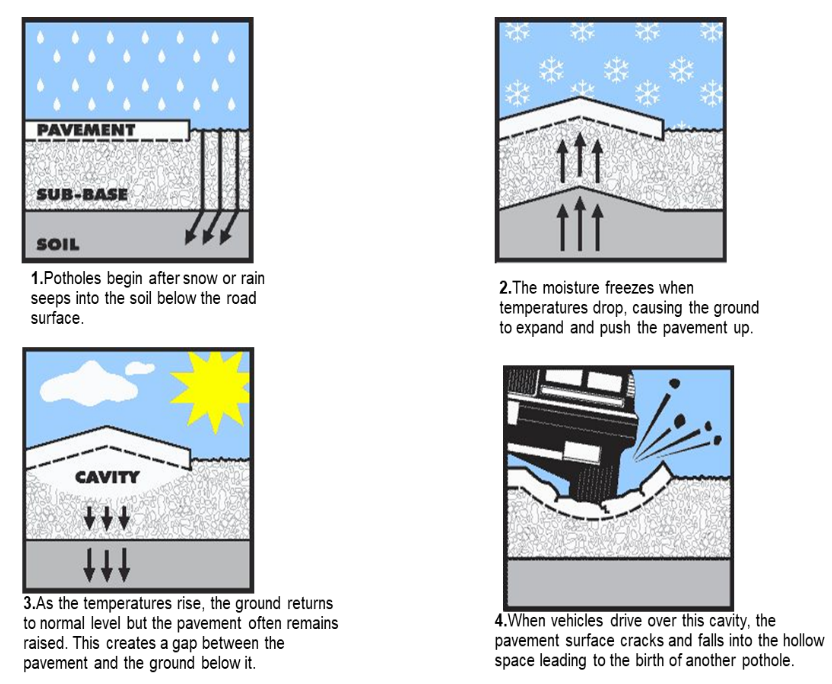

In [ ]:
df.columns

Index(['datetime', 'year', 'month', 'day', 'holiday', 'temp', 'tempmax',
       'tempmin', 'humidity', 'precip', 'snowdepth', 'solarenergy', 'weather',
       'dew', 'precipcover', 'windspeed', 'solarradiation', 'pothole',
       'tempmin^2', 'evap'],
      dtype='object')

In [ ]:
df = df[['datetime', 'year', 'month', 'day', 'holiday', 'temp', 'tempmax',
       'tempmin', 'humidity', 'precip', 'snowdepth', 'solarenergy', 'weather',
       'dew', 'precipcover', 'windspeed', 'solarradiation','tempmin^2', 'evap', 'pothole']]

In [ ]:
df['pothole'].describe()

count    2922.000000
mean      107.337782
std       106.838037
min         0.000000
25%        34.000000
50%        74.000000
75%       146.000000
max       977.000000
Name: pothole, dtype: float64

## 히트맵 - 전체변수

- 전체 변수에 대한 상관 분석을 실시해 유의미한 상관계수를 파악한다

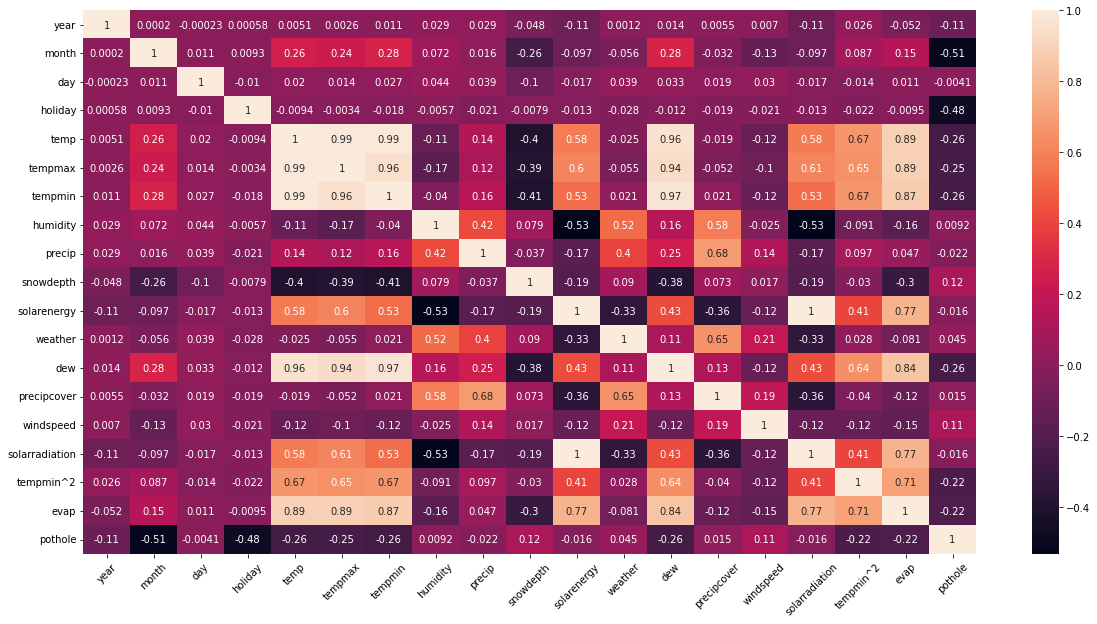

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 45)
plt.show()

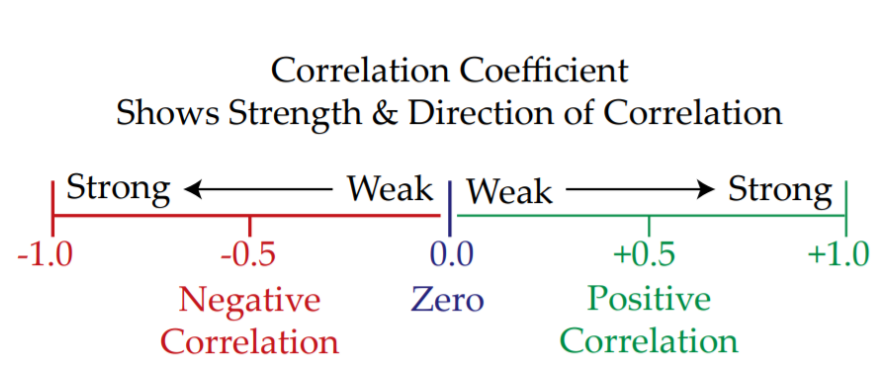

- 다른 변수들관의 상대적 기준치를 적용하여 상관계수가 0.1 이상이고 -0.1 이하인 x변수를 선택한다
  - year: - 0.11
  - month: -0.51
  - holiday: -0.48
  - temp: -0.26
  - tempmax: -0.25
  - tempmin: -0.26
  - snowdepth: 0.12
  - dew: -0.26
  - windspeed: 0.11 
  - tempmin^2: -0.22
  - evap: -0.22  

X = df[['year', 'month', 'holiday', 'temp', 'tempmax', 'tempmin', 'snowdepth', 'dew', 'windspeed']]

## year

- 연도 별 포트홀 발생 분포

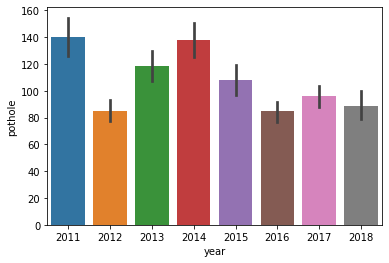

In [ ]:
sns.barplot(x = 'year', 
            y = 'pothole', 
            data = df)
plt.show() # 연도 별 포트홀 발생 분포

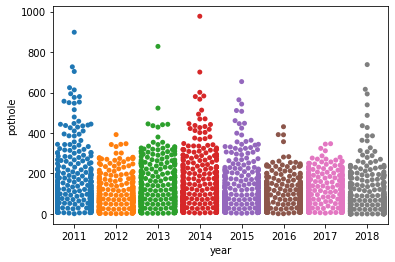

In [ ]:
sns.swarmplot(x = "year", y="pothole", data = df)
plt.show() # 연도 별 포트홀 발생 분포

## Month

- 월 별 포트홀 발생 분포

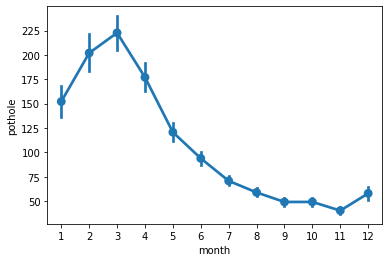

In [ ]:
sns.pointplot(x="month", y="pothole", data = df)
plt.show()

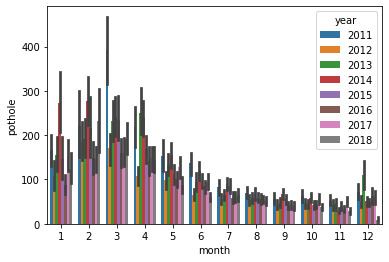

In [ ]:
sns.barplot(x="month", y="pothole", hue="year", data = df)
plt.show() # 해당 연도 월 별 포트홀 발생 분포

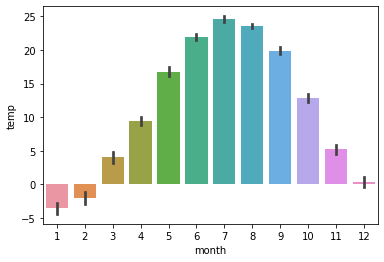

In [ ]:
sns.barplot(data = df, x = 'month',y = 'temp')
plt.show() # 월 별 기온

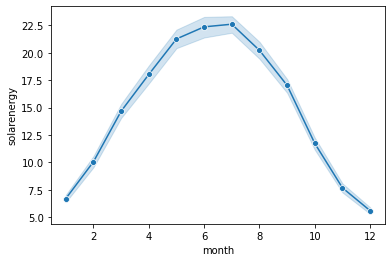

In [ ]:
sns.lineplot(data = df, x = 'month',y = 'solarenergy', marker='o')
plt.show() # 월 별 태양광 지수

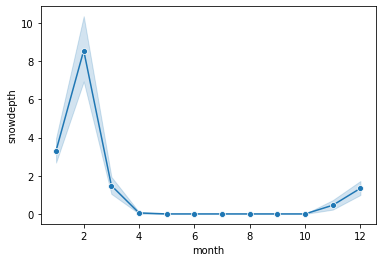

In [ ]:
sns.lineplot(data = df, x = 'month',y = 'snowdepth', marker = 'o')
plt.show() # 월 별 적설량

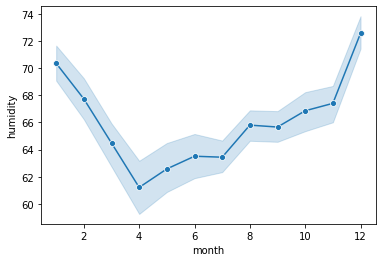

In [ ]:
sns.lineplot(data = df, x = 'month',y = 'humidity', marker='o')
plt.show() # 월 별 습도

## holiday

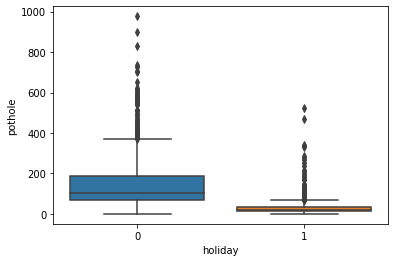

In [ ]:
sns.boxplot(x = 'holiday', y = 'pothole', data = df)
plt.show() # 휴일 기준 포트홀 발생 분포

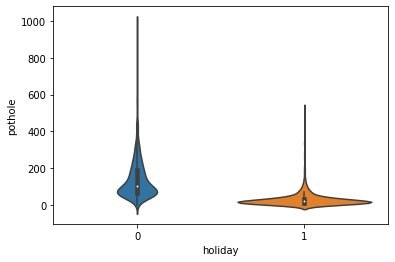

In [ ]:
sns.violinplot(x='holiday', y='pothole', data = df)
plt.show() # 휴일 기준 포트홀 발생 분포

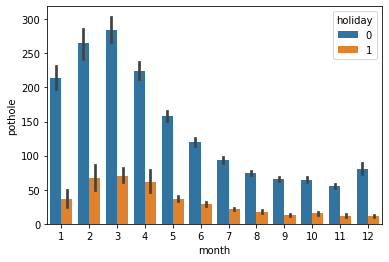

In [ ]:
sns.barplot(x ="month", y ="pothole", hue = "holiday", data=df)
plt.show() # 월 기준, holiday 별 포트홀 발생분포

## temp

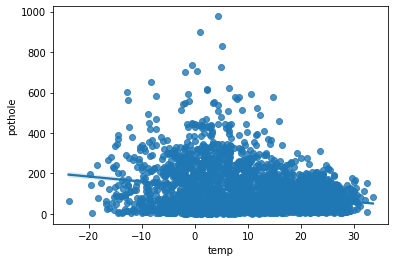

In [ ]:
sns.regplot(x="temp", y = "pothole", data = df)
plt.show() # 포트홀 발생 수와 기온 관계 -> 회귀선 통해 두 변수 간 상관관계 확인 

## tempmax

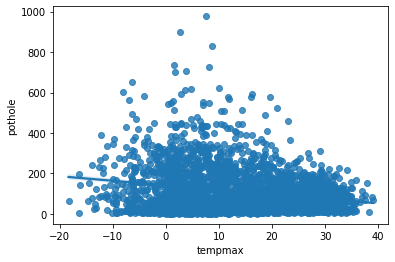

In [ ]:
sns.regplot(x="tempmax", y = "pothole", data = df)
plt.show() # 포트홀 발생 수와 최고기온 관계 -> 회귀선 통해 두 변수 간 상관관계 확인

## tempmin

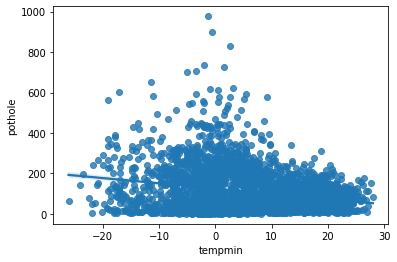

In [ ]:
sns.regplot(x="tempmin", y = "pothole", data = df)
plt.show() # 포트홀 발생 수와 최저기온 관계 -> 회귀선 통해 두 변수 간 상관관계 확인

## snowdepth

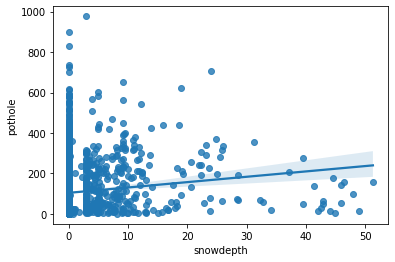

In [ ]:
sns.regplot(x="snowdepth", y = "pothole", data = df)
plt.show() # 포트홀 발생 수와 적설량 관계 -> 회귀선 통해 두 변수 간 상관관계 확인 

## dew
- 이슬점: 대기 속 수증기가 포화되어 물로 응결할 때의 온도

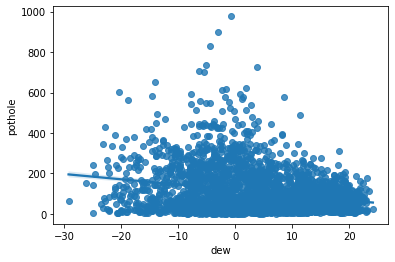

In [ ]:
sns.regplot(x="dew", y = "pothole", data = df)
plt.show() # 포트홀 발생 수와 이슬점 관계 -> 회귀선 통해 두 변수 간 상관관계 확인

## windspeed

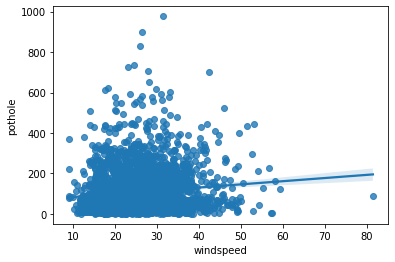

In [ ]:
sns.regplot(x="windspeed", y = "pothole", data = df)
plt.show() # 포트홀 발생 수와 풍속 관계 -> 회귀선 통해 두 변수 간 상관관계 확인

## 그 외 상관계수가 낮은 변수 시각화

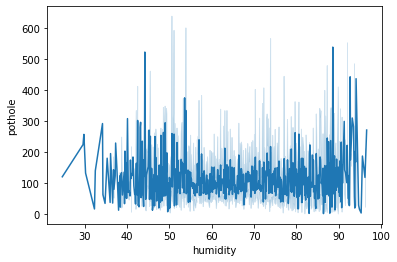

In [ ]:
sns.lineplot(x="humidity", y="pothole", data = df)
#x값에 따른 y값의 평균값을 선으로 연결 = 습도 + 포트홀 발생 분포 

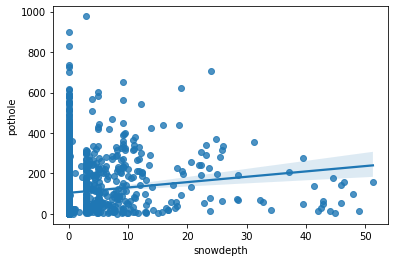

In [ ]:
sns.regplot(x="snowdepth", y = "pothole", data = df)
# 적설량에 대한 포트홀 발생분포 > 회귀선 통해 두 변수 간 상관관계 확인

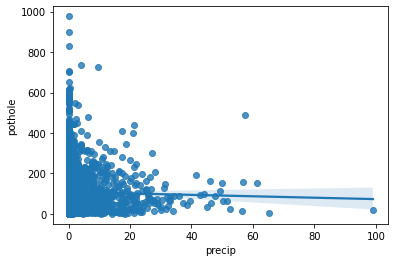

In [ ]:
sns.regplot(x="precip", y = "pothole", data = df)
plt.plot()
plt.show()
# 강수량에 대한 포트홀 발생분포 > 회귀선 통해 두 변수 간 상관관계 확인

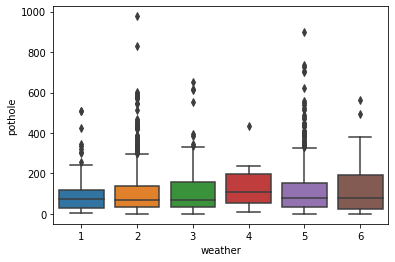

In [ ]:
sns.boxplot(x = 'weather',y = 'pothole', data = df)
plt.show()
# 날씨 아이콘별 포트홀 발생 분포
# 1 : clear-day
# 2 : partly-cloudy-day
# 3 : cloudy
# 4 : wind
# 5 : rain
# 6 : snow 

## 파생 변수 시각화

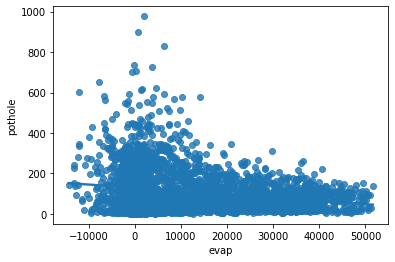

In [ ]:
sns.regplot(x="evap", y = "pothole", data = df)
plt.show() # 증발 정도와 포트홀 발생 수 관계

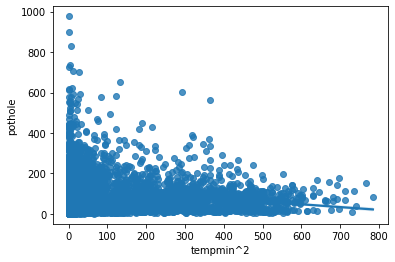

In [ ]:
sns.regplot(x="tempmin^2", y = "pothole", data = df)
plt.show() # 최저기온^2과 포트홀 발생 수 관계

## Polynomial Regreesion 시도

연속형 변수의 차수를 높여 다항회귀모델 시도 


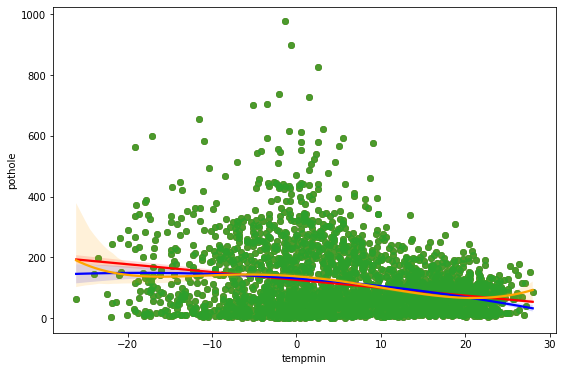

In [ ]:
plt.figure(figsize = (9, 6))
sns.regplot(x = 'tempmin', y = 'pothole', data = df, line_kws = {'color':'red'})
sns.regplot(x = 'tempmin', y = 'pothole', data = df, line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'tempmin', y = 'pothole', data = df, line_kws = {'color':'orange'}, order = 5)
plt.show()

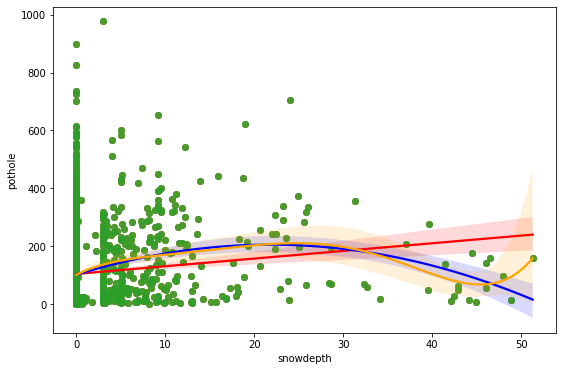

In [ ]:
plt.figure(figsize = (9, 6))
sns.regplot(x = 'snowdepth', y = 'pothole', data = df, line_kws = {'color':'red'})
sns.regplot(x = 'snowdepth', y = 'pothole', data = df,line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'snowdepth', y = 'pothole', data = df, line_kws = {'color':'orange'}, order = 5)
plt.show()

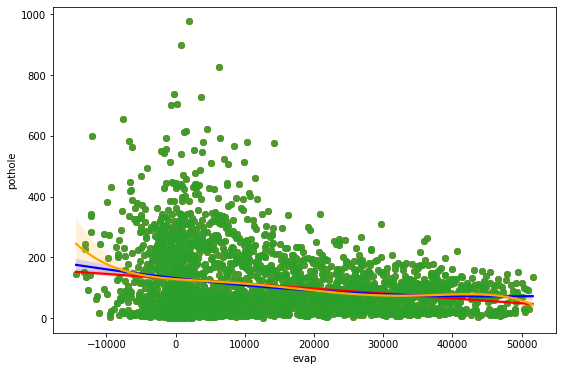

In [ ]:
plt.figure(figsize = (9, 6))
sns.regplot(x = 'evap', y = 'pothole', data = df, line_kws = {'color':'red'})
sns.regplot(x = 'evap', y = 'pothole', data = df, line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'evap', y = 'pothole', data = df, line_kws = {'color':'orange'}, order = 5)
plt.show()

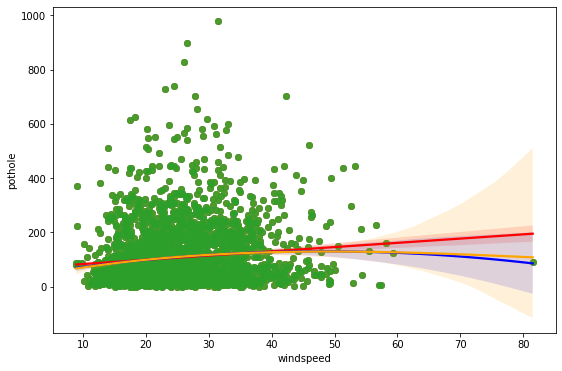

In [ ]:
plt.figure(figsize = (9, 6))
sns.regplot(x = 'windspeed', y = 'pothole', data = df, line_kws = {'color':'red'})
sns.regplot(x = 'windspeed', y = 'pothole', data = df, line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'windspeed', y = 'pothole', data = df, line_kws = {'color':'orange'}, order = 3)
plt.show()